# First Steps with TensorFlow

In this notebook, we will see some of the basics of TensorFlow.

The TensorFlow workflow can be broken down into 2 most basic steps:
- Build the computational graph
- Execute the computational graph

We build the computational graph using `tf.operations` and execute it using `tf.session`.

<hr/>

Prerequisites:
- numpy
- pandas
- matplotlib.pyplot

<hr/>

TensorFlow has the best documentation among all deep learning libraries, which is one of the reasons that makes it so much popular!<br/>
Link to the documentation: 
- https://www.tensorflow.org/tutorials/
- https://www.tensorflow.org/guides/


## TensorFlow APIs

With TensorFlow, we have range of APIs that can be used from beginners to advanced!<br/>

In a nutshell, there are two types of APIs
- high level API [ tf.Estimators ]
- low level APIs [ tf.Graph and tf.Session ]

### With the High level API - tf.Estimators
There are a couple of predifined operations and all we need to do is to define our input function and train the model!

### With the low level API - `tf.Graph` and `tf.Session`
We need to define the workflow using tensors and we need to define all the operations (using `tf.operations`) that would take place in the computational graph and then execute the graph using `tf.Session`

TensorFlow also has two other modes
- tf.keras
- EagerExecution

### tf.keras

TensorFlow has the keras API available through its API, which makes life easy for the people who want to quickly build a model and evaluate the results.

> _Keras?_<br/>
> _Keras is a high level Deep Learning API with which you can_<br/>
> _build deep learning architectures as you build Lego models!!_<br/>

### EagerExecution
In general, if you run print out a `tf.tensor` or the result of a `tf.operation` then you won't be able to see it's output!<br/>
Only when you run these `tf.tensor` or `tf.operation` using `tf.Session` then only you will be able to see its output.<br/>
But, with `EagerExecution` (or an `InteractiveSession()`) we will be able to see its output on the go!

---

Okay, so we will be starting out with 
 - the high level API using `tf.Estimators`
 
 
 and then move to 
 
 - the low level API using `tf.Graph` and `tf.Session`
 
 
 Let's get started!!



## High Level API - `tf.Estimator`

**Learning Objectives:**
  * Use the `LinearRegressor` class in TensorFlow to predict median housing price, at the granularity of city blocks, based on one input feature
  * Evaluate the accuracy of a model's predictions using Root Mean Squared Error (RMSE)
  * Improve the accuracy of a model by tuning its hyperparameters
  

In [9]:
# Essential imports
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import cm
import matplotlib.pyplot as plt
import math
from IPython import display

from tensorflow.python.data import Dataset
from sklearn import metrics

tf.logging.set_verbosity(tf.logging.ERROR)


## Load the dataset

Let's now load the dataset using `pandas`!

In [10]:
# This requires active internet connection
df = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv', sep=',')

Now let's view the data that we currently loaded in the variable `df`.<br/>

> _df?_<br/>
> _DataFrame_<br/>
> _The two most common types that one faces while programming with pandas are_<br/>
> - _pd.Series_
> - _pd.DataFrame_



In [12]:
# pd.DataFrame.head(num) - num indicates the number of columns to show from top
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [14]:
# pd.DataFrame.tail(num) - num indicates the number of columns to show from bottom
df.tail(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


In [15]:
# pd.DataFrame.sample(num) - num indicates the number of columns to randomly sample from the data
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9439,-119.25,35.78,35.0,1927.0,386.0,1371.0,414.0,2.2981,69900.0
2231,-117.40,33.96,51.0,1806.0,322.0,709.0,298.0,3.5750,125500.0
8722,-118.58,34.20,35.0,1558.0,267.0,793.0,249.0,5.1463,220200.0
8551,-118.51,35.16,7.0,4371.0,727.0,1932.0,654.0,4.6250,136800.0
3545,-117.90,33.63,32.0,3556.0,521.0,1381.0,537.0,6.1426,450700.0


Now, we just loaded the data from the `.csv` file.<br/>
There is a possibility that the data contains some kind of pattern as one moves from the top to the bottom.<br/>

Example?<br/>
Maybe some feature in the dataset is stored in an increasing or decreasing fashion, <br/>
while creating the dataset. And we don't want that.<br/>
So, we need to shufle the data!<br/>

Why?<br/>
Shuffling data serves the purpose of reducing variance and making sure that models remain general and overfit less.<br/>
Or, maybe the dataset is sorted with repect to the class/target value.<br/>
In that case, we need shuffling, as the batch in which we will train the data will just optimize the overall loss function <br/>
for just one class. And this generally leads to getting stuck in a local optima. Which means we will not get a good accuracy while<br/>
fitting the data.


Okay, let's start shuffling!

In [16]:
# The `.index` attribute returns a RangeIndex object 
# which specifies the start and end range with the step
# np.random.permutation returns a permutation array from the start to the end (considering the step)
permutation_of_dataset = np.random.permutation(df.index)

# passing the permutation array and reindexing the dataset
df_reindexed = df.reindex(permutation_of_dataset)

In [17]:
# Checking reindexed df
df_reindexed.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
6247,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
12932,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
4927,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
2631,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
12084,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Okay, now we need are to predict the feature `median_house_value` using just one feature.

> _Why just one feature?_<br/>
> _Cause we are going to use LinearRegression model_ <br/>
> _And in LinearRegression model we take one feature and try to predict another feature_<br/>
> _by drawing a "straight" line._

Now, let's scale the target value `median_house_value` by `1000.0`.<br/>
This will make it easy for us to predict the value of the `median_house_value` using smaller learning_rates.

In [18]:
df_reindexed['median_house_value'] /= 1000
df_reindexed['median_house_value'].head(5)

6247     66.9
12932    80.1
4927     85.7
2631     73.4
12084    65.5
Name: median_house_value, dtype: float64

## Examine the data

Now, let's start by examining the data.<br/>
We can get  a quick summary of the dataset using the `.describe()` function of the `pd.DataFrame`<br/>

It returns the
- count -> Number of non-empty values
- mean -> mean of that feature
- std -> Standard deviation of that feature
- min -> Min value of that feature
- max -> Max value of that feature
- 25% - The 25th percentile
- 50% - The 50th percentile
- 75% - The 75th percentile

In [19]:
df_reindexed.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


## Build the First Model

In this exercise, we'll try to predict `median_house_value`, which will be our label (sometimes also called a target). We'll use `total_rooms` as our input feature.

**NOTE:** Our data is at the city block level, so this feature represents the total number of rooms in that block.

To train our model, we'll use the [LinearRegressor](https://www.tensorflow.org/api_docs/python/tf/estimator/LinearRegressor) interface provided by the TensorFlow [Estimator](https://www.tensorflow.org/get_started/estimator) API.<br/>

This API takes care of a lot of the low-level functionalities and exposes convenient methods for performing model training, evaluation, and inference.

We will follow 6 general steps to build the model:
 - Define the feature columns
 - Define the target columns
 - Configure the model (In this case, the `tf.Estimator` API LinearRegression)
 - Define the `input_fn` which will return the features, and labels
 - Train the model
 - Evaluate the model
 
 
 Okay, let the fun begin!
 
 
 **NOTE: A MAJOR PART OF THE FOLLOWING CODE _(TILL PART 1 END)_ IS TAKEN FROM OFFICIAL GOOGLE TENSORFLOW BASICS NOTEBOOK:**<br/>
 https://colab.research.google.com/drive/1fKbdYB7T8leVVFZNgA72U0ccrYmSVw8l?authuser=2#scrollTo=2WP_Dq-oThcc

### Step 1: Define and configure the feature columns

In order to import our training data into TensorFlow, we need to specify what type of data each feature contains. There are two main types of data we'll use in this and future exercises:

* **Categorical Data**: Data that is textual. In this exercise, our housing data set does not contain any categorical features, but examples you might see would be the home style, the words in a real-estate ad.

* **Numerical Data**: Data that is a number (integer or float) and that you want to treat as a number. As we will discuss more later sometimes you might want to treat numerical data (e.g., a postal code) as if it were categorical.

In TensorFlow, we indicate a feature's data type using a construct called a **feature column**. Feature columns store only a description of the feature data; they do not contain the feature data itself.

To start, we're going to use just one numeric input feature, `total_rooms`. The following code pulls the `total_rooms` data from our `california_housing_dataframe` and defines the feature column using `numeric_column`, which specifies its data is numeric:

In [0]:
# Define the input feature: total_rooms.
my_feature = df[["total_rooms"]]

# Configure a numeric feature column for total_rooms.
feature_columns = [tf.feature_column.numeric_column("total_rooms")]

**NOTE:** The shape of our `total_rooms` data is a one-dimensional array (a list of the total number of rooms for each block). This is the default shape for `numeric_column`, so we don't have to pass it as an argument.

### Step 2: Define the target

Next, we'll define our target, which is `median_house_value`. Again, we can pull it from our `california_housing_dataframe`

In [0]:
# Define the label.
targets = df_reindexed["median_house_value"]

### Step 3: Configure the LinearRegressor

Next, we'll configure a linear regression model using LinearRegressor. We'll train this model using the GradientDescentOptimizer, which implements Mini-Batch Stochastic Gradient Descent (SGD). The learning_rate argument controls the size of the gradient step.

NOTE: To be safe, we also apply [`gradient clipping`](https://developers.google.com/machine-learning/glossary/#gradient_clipping) to our optimizer via clip_gradients_by_norm. Gradient clipping ensures the magnitude of the gradients do not become too large during training, which can cause gradient descent to fail.

In [0]:
# Use gradient descent as the optimizer for training the model.
# Set a learning rate of 0.0000001 for Gradient Descent.
my_optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.0000001)
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

# Configure the linear regression model with our feature columns and optimizer.
linear_regressor = tf.estimator.LinearRegressor(
    feature_columns=feature_columns,
    optimizer=my_optimizer
)

### Step 4: Define the Input Function

To import our California housing data into our `LinearRegressor`, we need to define an input function, which instructs TensorFlow how to preprocess
the data, as well as how to batch, shuffle, and repeat it during model training.

First, we'll convert our *pandas* feature data into a dict of NumPy arrays. We can then use the TensorFlow [Dataset API](https://www.tensorflow.org/programmers_guide/datasets) to construct a dataset object from our data, and then break
our data into batches of `batch_size`, to be repeated for the specified number of epochs (num_epochs). 

**NOTE:** When the default value of `num_epochs=None` is passed to `repeat()`, the input data will be repeated indefinitely.

Next, if `shuffle` is set to `True`, we'll shuffle the data so that it's passed to the model randomly during training. The `buffer_size` argument specifies
the size of the dataset from which `shuffle` will randomly sample.

Finally, our input function constructs an iterator for the dataset and returns the next batch of data to the LinearRegressor.

In [0]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of one feature.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
  
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(buffer_size=10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

### Step 5: Train the Model

We can now call `train()` on our `linear_regressor` to train the model. We'll wrap `my_input_fn` in a `lambda`
so we can pass in `my_feature` and `target` as arguments (see this [TensorFlow input function tutorial](https://www.tensorflow.org/get_started/input_fn#passing_input_fn_data_to_your_model) for more details), and to start, we'll
train for 100 steps.

In [0]:
_ = linear_regressor.train(
    input_fn = lambda:my_input_fn(my_feature, targets),
    steps=100
)

### Step 6: Evaluate the Model

Let's make predictions on that training data, to see how well our model fit it during training.

**NOTE:** Training error measures how well your model fits the training data, but it **_does not_** measure how well your model **_generalizes to new data_**. In later exercises, you'll explore how to split your data to evaluate your model's ability to generalize.


In [0]:
# Create an input function for predictions.
# Note: Since we're making just one prediction for each example, we don't 
# need to repeat or shuffle the data here.
prediction_input_fn =lambda: my_input_fn(my_feature, targets, num_epochs=1, shuffle=False)

# Call predict() on the linear_regressor to make predictions.
predictions = linear_regressor.predict(input_fn=prediction_input_fn)

# Format predictions as a NumPy array, so we can calculate error metrics.
predictions = np.array([item['predictions'][0] for item in predictions])

# Print Mean Squared Error and Root Mean Squared Error.
mean_squared_error = metrics.mean_squared_error(predictions, targets)
root_mean_squared_error = math.sqrt(mean_squared_error)
print("Mean Squared Error (on training data): %0.3f" % mean_squared_error)
print("Root Mean Squared Error (on training data): %0.3f" % root_mean_squared_error)

Mean Squared Error (on training data): 56370.286
Root Mean Squared Error (on training data): 237.424


Is this a good model? How would you judge how large this error is?

Mean Squared Error (MSE) can be hard to interpret, so we often look at Root Mean Squared Error (RMSE)
instead.  A nice property of RMSE is that it can be interpreted on the same scale as the original targets.

Let's compare the RMSE to the difference of the min and max of our targets:

In [0]:
min_house_value = df_reindexed["median_house_value"].min()
max_house_value = df_reindexed["median_house_value"].max()
min_max_difference = max_house_value - min_house_value

print("Min. Median House Value: %0.3f" % min_house_value)
print("Max. Median House Value: %0.3f" % max_house_value)
print("Difference between Min. and Max.: %0.3f" % min_max_difference)
print("Root Mean Squared Error: %0.3f" % root_mean_squared_error)

Min. Median House Value: 14.999
Max. Median House Value: 500.001
Difference between Min. and Max.: 485.002
Root Mean Squared Error: 237.424


Our error spans nearly half the range of the target values. Can we do better?

This is the question that nags at every model developer. Let's develop some basic strategies to reduce model error.

The first thing we can do is take a look at how well our predictions match our targets, in terms of overall summary statistics.

In [0]:
calibration_data = pd.DataFrame()
calibration_data["predictions"] = pd.Series(predictions)
calibration_data["targets"] = pd.Series(targets)
calibration_data.describe()

,predictions,targets
count,17000.000000,17000.000000
mean,0.132183,207.300912
std,0.108997,115.983764
min,0.000100,14.999000
25%,0.073100,119.400000
50%,0.106350,180.400000
75%,0.157562,265.000000
max,1.896843,500.001000


Okay, maybe this information is helpful. How does the mean value compare to the model's RMSE? How about the various quantiles?

We can also visualize the data and the line we've learned.  Recall that linear regression on a single feature can be drawn as a line mapping input *x* to output *y*.

First, we'll get a uniform random sample of the data so we can make a readable scatter plot.

In [0]:
sample = df_reindexed.sample(n=300)

Next, we'll plot the line we've learned, drawing from the model's bias term and feature weight, together with the scatter plot. The line will show up red.

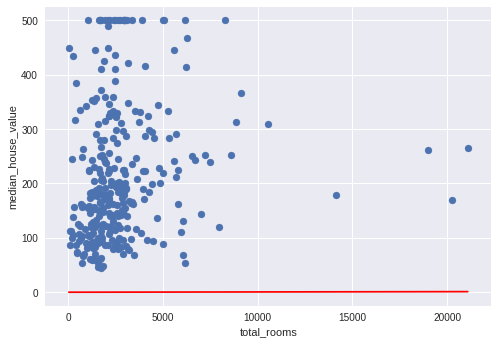

In [0]:
# Get the min and max total_rooms values.
x_0 = sample["total_rooms"].min()
x_1 = sample["total_rooms"].max()

# Retrieve the final weight and bias generated during training.
weight = linear_regressor.get_variable_value('linear/linear_model/total_rooms/weights')[0]
bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

# Get the predicted median_house_values for the min and max total_rooms values.
y_0 = weight * x_0 + bias 
y_1 = weight * x_1 + bias

# Plot our regression line from (x_0, y_0) to (x_1, y_1).
plt.plot([x_0, x_1], [y_0, y_1], c='r')

# Label the graph axes.
plt.ylabel("median_house_value")
plt.xlabel("total_rooms")

# Plot a scatter plot from our data sample.
plt.scatter(sample["total_rooms"], sample["median_house_value"])

# Display graph.
plt.show()

This initial line looks way off. See if you can look back at the summary stats and see the same information encoded there.

Together, these initial sanity checks suggest we may be able to find a much better line.


## Tweak the Model Hyperparameters
For this exercise, we've put all the above code in a single function for convenience. You can call the function with different parameters to see the effect.

In this function, we'll proceed in 10 evenly divided periods so that we can observe the model improvement at each period.

For each period, we'll compute and graph training loss.  This may help you judge when a model is converged, or if it needs more iterations.

We'll also plot the feature weight and bias term values learned by the model over time.  This is another way to see how things converge.

In [0]:
def train_model(learning_rate, steps, batch_size, input_feature="total_rooms"):
  """Trains a linear regression model of one feature.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    input_feature: A `string` specifying a column from `california_housing_dataframe`
      to use as input feature.
  """
  
  periods = 10
  steps_per_period = steps / periods

  my_feature = input_feature
  my_feature_data = df_reindexed[[my_feature]]
  my_label = "median_house_value"
  targets = df_reindexed[my_label]

  # Create feature columns.
  feature_columns = [tf.feature_column.numeric_column(my_feature)]
  
  # Create input functions.
  training_input_fn = lambda:my_input_fn(my_feature_data, targets, batch_size=batch_size)
  prediction_input_fn = lambda: my_input_fn(my_feature_data, targets, num_epochs=1, shuffle=False)
  
  # Create a linear regressor object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=feature_columns,
      optimizer=my_optimizer
  )

  # Set up to plot the state of our model's line each period.
  plt.figure(figsize=(15, 6))
  plt.subplot(1, 2, 1)
  plt.title("Learned Line by Period")
  plt.ylabel(my_label)
  plt.xlabel(my_feature)
  sample = df_reindexed.sample(n=300)
  plt.scatter(sample[my_feature], sample[my_label])
  colors = [cm.coolwarm(x) for x in np.linspace(-1, 1, periods)]

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  root_mean_squared_errors = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    # Take a break and compute predictions.
    predictions = linear_regressor.predict(input_fn=prediction_input_fn)
    predictions = np.array([item['predictions'][0] for item in predictions])
    
    # Compute loss.
    root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(predictions, targets))
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    root_mean_squared_errors.append(root_mean_squared_error)
    # Finally, track the weights and biases over time.
    # Apply some math to ensure that the data and line are plotted neatly.
    y_extents = np.array([0, sample[my_label].max()])
    
    weight = linear_regressor.get_variable_value('linear/linear_model/%s/weights' % input_feature)[0]
    bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

    x_extents = (y_extents - bias) / weight
    x_extents = np.maximum(np.minimum(x_extents,
                                      sample[my_feature].max()),
                           sample[my_feature].min())
    y_extents = weight * x_extents + bias
    plt.plot(x_extents, y_extents, color=colors[period]) 
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.subplot(1, 2, 2)
  plt.ylabel('RMSE')
  plt.xlabel('Periods')
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(root_mean_squared_errors)

  # Output a table with calibration data.
  calibration_data = pd.DataFrame()
  calibration_data["predictions"] = pd.Series(predictions)
  calibration_data["targets"] = pd.Series(targets)
  display.display(calibration_data.describe())

  print("Final RMSE (on training data): %0.2f" % root_mean_squared_error)

Now, let's get a lower error!

Training model...
RMSE (on training data):
  period 00 : 236.32
  period 01 : 235.11
  period 02 : 233.90
  period 03 : 232.70
  period 04 : 231.50
  period 05 : 230.31
  period 06 : 229.13
  period 07 : 227.96
  period 08 : 226.79
  period 09 : 225.63
Model training finished.


AttributeError: ignored

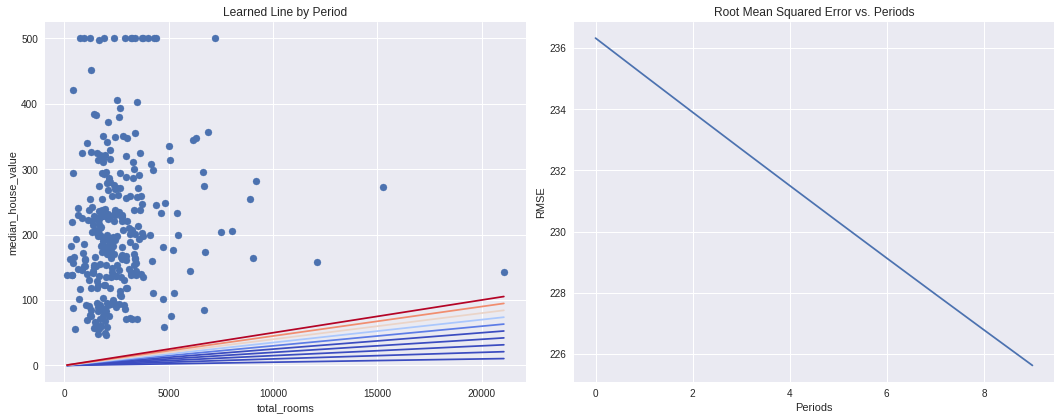

In [0]:
train_model(
    learning_rate=0.00001,
    steps=100,
    batch_size=1
)

Now, think and tweak the parameters yourself!

# 2. Linear Regression using low level APIs

Okay, so we solved the linear regression problem on the california dataset.
Created a machine Learning pipepline where with which we can easily tweak the hyerparameters and see how chaning the input feature and the parameters effects the model.

Now, let's see how to implement the same using the low level APIs!

So, you will be doing the calculations that tf is doing in the background!

In [0]:
# Dataset processing functions
class DatasetSplit(object):
    def __init__(self, x, y, bs):
        self.x = x
        self.y = y
        self.bs = bs
        self.start_split = 0
        self.its = 1
        
    def get_next_batch(self):
        flag = True
        while flag:
            self.start_split = self.its * self.bs
            ee = min(len(self.x), self.start_split + self.bs)
            self.its += 1
            #print(self.start_split, ee)
            if len(self.x) == ee:
                flag = False
            yield self.x[self.start_split : ee], self.y[self.start_split : ee]
        
class Dataset(object):
    x = None
    y = None
    def __init__(self, X, Y, bs, split=[0.9, 0.1]):
        self.x = X
        self.y = Y
        self.bs = bs
        
        self.train_x = self.x[: int(0.9 * len(self.x))]
        self.train_y = self.y[: int(0.9 * len(self.y))]
        
        self.test_x = self.x[int(0.9 * len(self.x)):]
        self.test_y = self.y[int(0.9 * len(self.y)):]
        
    def train(self):
        return DatasetSplit(self.train_x, self.train_y, bs=self.bs)
    
    def test(self):
        return DatasetSplit(self.test_x, self.test_y, bs=len(self.test_x))

In [0]:
# Getting the test and train sets
train_x = np.array(df['total_rooms'][:15000])
train_y = np.array(df['median_house_value'])[:15000] / 1000
test_x = np.array(df['total_rooms'][15000:])
test_y = np.array(df['median_house_value'])[15000:] / 1000

In [0]:
# Definiing the hyperparameters
learning_rate = 0.0001
batch_size = 8
n_epochs = 100
periods = 10

In [0]:
# tf.placeholders
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [0]:
# Define the model
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# This returns a tensor
y_pred = tf.add(tf.multiply(W, x), b)

# Alternatively, we can also
# y_pred = (W * x) + b

In [0]:
# Define the cost
cost = tf.reduce_sum(tf.pow(y - y_pred, 2)) / batch_sizeuber

In [0]:
# Define the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

The computaional Graph is now built and looks very similar to this

![alt text](https://)

Now let's execute the graph using sessions

In [0]:
# Defining the sessions

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for epoch in range(n_epochs):
    for xs, ys in zip(train_x, train_y):
      #print (xs.shape, ys.shape)
      #print (xs, ys)
      #break
      sess.run(optimizer, feed_dict={x: xs, 
                                     y: ys / 1000})
      
    if (epoch+1) % periods == 0 or epoch == 0:
      curr_loss = sess.run(cost, feed_dict={x: test_x, 
                                            y: test_y / 1000})
      print ('Loss at epoch ', epoch+1, ' is :', curr_loss)

Loss at epoch  1  is : nan
Loss at epoch  10  is : nan
Loss at epoch  20  is : nan
Loss at epoch  30  is : nan
Loss at epoch  40  is : nan
Loss at epoch  50  is : nan
Loss at epoch  60  is : nan
Loss at epoch  70  is : nan
Loss at epoch  80  is : nan
Loss at epoch  90  is : nan
Loss at epoch  100  is : nan


In [0]:
del cost

NameError: ignored

In [0]:
train_x[:4]

array([5612., 7650.,  720., 1501.])

In [0]:
train_y[:4]

array([66900., 80100., 85700., 73400.])